<b>Load the preprocessed files</b>

In [1]:
#Imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#skitlearn packages
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc, log_loss
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
# X_train = np.loadtxt('./data/preprocessed/X_train.csv', delimiter=',')
# X_test = np.loadtxt('./data/preprocessed/X_test.csv', delimiter=',')
# y_train = np.loadtxt('./data/preprocessed/y_train.csv', delimiter=',')

In [3]:
preproccessed_train_df = pd.read_csv(r'./preprocessedData/train-preprocessed.csv')
preproccessed_test_df = pd.read_csv(r'./preprocessedData/test-preprocessed.csv')

In [4]:
preproccessed_train_df.shape

(276759, 212)

In [5]:
preproccessed_test_df.shape

(30752, 212)

In [6]:
X_train_df = preproccessed_train_df.drop(columns=["Unnamed: 0", "SK_ID_CURR", "TARGET"])
X_test_df = preproccessed_test_df.drop(columns=["Unnamed: 0", "SK_ID_CURR", "TARGET"])

In [7]:
Y_train_df = preproccessed_train_df[["TARGET"]]
Y_test_df = preproccessed_test_df[["TARGET"]]

In [8]:
print(Y_train_df.shape)
print(X_train_df.shape)

(276759, 1)
(276759, 209)


In [9]:
RF = RandomForestClassifier(n_estimators = 200, random_state = 50, verbose = 1, n_jobs = -1)
RF.fit(X_train_df,Y_train_df)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   56.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [10]:
features = list(X_train_df.columns)

In [11]:
feature_importance_values = RF.feature_importances_
feature_importances = pd.DataFrame({'Feature': features, 'Importance': feature_importance_values})

In [12]:
predictions = RF.predict_proba(X_test_df)[:, 1]

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.5s finished


In [13]:
predictions

array([0.195, 0.09 , 0.145, ..., 0.05 , 0.05 , 0.085])

In [14]:
[fpr, tpr, thr] = roc_curve(Y_test_df, predictions)

In [15]:
print("RandomForest baseline log_loss: %2.3f" % log_loss(Y_test_df, predictions))
print("RandomForest baseline roc auc: %0.3f" % auc(fpr, tpr))

RandomForest baseline log_loss: 0.254
RandomForest baseline roc auc: 0.727


In [27]:
def plot_roc_curve(false_positive, true_positive):
    plt.step(false_positive, true_positive, alpha=0.7, color='seagreen')
    plt.fill_between(false_positive, true_positive, alpha=0.5, color='mediumseagreen')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('ROC-AUC curve: AUC={0:0.3f}'.format(auc(fpr, tpr)))

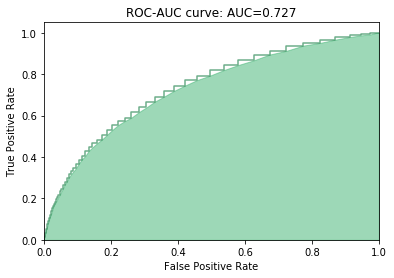

In [28]:
plot_roc_curve(fpr,tpr)

<Figure size 720x1152 with 0 Axes>

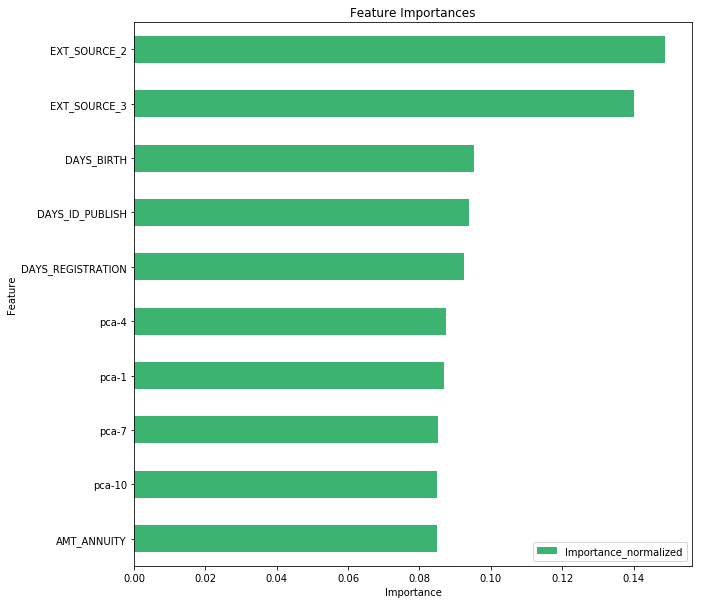

In [22]:
total_feature_importance = feature_importances['Importance'].sum()
feature_importances['Importance_normalized'] = feature_importances['Importance'] / total_feature_importance
feature_importances = feature_importances.sort_values('Importance_normalized', ascending = True).tail(10)

#plotting the top 10 features
plt.figure(figsize = (10, 16))

ax = feature_importances.plot(x = 'Feature' , y = 'Importance_normalized', kind = 'barh', figsize=(10,10), color = 'mediumseagreen')

plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()
